In [18]:
import pandas as pd
import numpy as np
from scipy import sparse
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [20]:
import rainbow
import os
import glob

## Import the jsonified transactions into a dataframe

In [21]:
path = '/Users/Sarah/galvanize/dsi-capstone/jsons/'
all_files = glob.glob(os.path.join(path, "*.json"))

In [22]:
df = pd.concat((pd.read_json(f,keep_default_dates=False,lines=True) for f in all_files)) 

## Import just one day into a dataframe 

In [23]:
#df=pd.read_json('./jsons/1.json',keep_default_dates=False,lines=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73865 entries, 0 to 3052
Data columns (total 10 columns):
date      73865 non-null object
gross+    73865 non-null float64
gross-    73865 non-null float64
items     73865 non-null object
net       73865 non-null float64
oper      73865 non-null int64
term      73865 non-null int64
time      73865 non-null object
trans     73865 non-null int64
type      73865 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 6.2+ MB


In [16]:
items=[]
item_dict = defaultdict(int)
for row,basket in df['items']:
        count_of_items = 0
        for item in basket:
            count_of_items +=1
            items.append(item[1])
            item_dict[item[1]] += 1
        print (basket.iloc)
        df['total_of_items'].at=count_of_items
items_set=set(items)

ValueError: too many values to unpack (expected 2)

In [25]:
def get_items(df,most_common=10,least_common=5):
    df['total_of_items'] = 0
    stoppers = ['BAG CREDIT','SF Bag Charge','Gift Card Reload','8 OZ BIO TUB t3', '16OZ BIO TUB t4',
                 '32OZ BIO TUB t5','BOTTLE DEPOSIT','6PACK BEER SMALL C']

    
    '''build a dictionary where the keys are the words
    in the dataframe items column'''
    
    items=[]
    item_dict = defaultdict(int)
    
    for basket in df['items']:
        
        for item in basket:
            
            items.append(item[1])
            item_dict[item[1]] += 1
    
    items_set=set(items)

    
    '''add the most common words to the stopwords list'''
    stopwords=list([i[0] for i in Counter(item_dict).most_common(most_common)])
    
    for s in stoppers:
        stopwords.append(s)
        
    '''add items containing "CRV" to the stopwords list'''
    for item in items_set:
        if "crv" in item.lower():
            stopwords.append(item)
    
    '''add the least common words to the stopwords list'''
    for key,value in item_dict.items():
        if value < least_common:
            stopwords.append(key)
    print(type(stopwords) )  
    stopwords = set(stopwords)
    
    '''iterate through the baskets and add items to items_set
    if not in stopwords (too common or too uncommon)'''
    for stops in stopwords:
        items_set.remove(stops)
  

    return items_set,stopwords, item_dict

items_set,stopwords,item_dict = get_items(df,most_common=5,least_common=5)

<class 'list'>


In [27]:
Counter(items_set).most_common(5)

[('Spearmint Mouthwas', 1),
 ('GLOW', 1),
 ('Clearly Natural So', 1),
 ('ORG 72% CHOCOLATE', 1),
 ('OZUKE KIMCHI', 1)]

In [28]:
len(item_dict)

21461

In [29]:
len(items_set)

13296

In [30]:
len(stopwords)

8165

In [31]:
len(stopwords)/len(items_set)

0.6140944645006017

In [32]:
df.shape[0]

73865

In [33]:
item_matrix = np.zeros((df.shape[0],len(items_set)))

In [34]:
len(items_set)

13296

In [35]:
df_items= pd.DataFrame(item_matrix,columns=items_set)

In [36]:
df_items.shape

(73865, 13296)

In [37]:
df.shape

(73865, 11)

In [38]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3043, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052],
           dtype='int64', length=73865)

In [39]:
df=df.reset_index()

In [40]:
df.index

RangeIndex(start=0, stop=73865, step=1)

In [41]:
df.describe()

,index,gross+,gross-,net,oper,term,trans,total_of_items
count,73865.000000,73865.000000,73865.000000,73865.000000,73865.000000,73865.000000,73865.000000,73865.0
mean,1331.635714,119.707593,4.104208,115.603385,129.191782,4.843986,147.200149,0.0
std,784.366767,503.477908,88.814536,482.132335,350.556723,2.951749,106.353866,0.0
min,0.000000,0.000000,0.000000,-521.080000,1.000000,1.000000,1.000000,0.0
25%,659.000000,13.500000,0.000000,13.010000,27.000000,2.000000,61.000000,0.0
50%,1319.000000,39.330000,0.000000,38.620000,60.000000,5.000000,128.000000,0.0
75%,1978.000000,87.430000,0.000000,85.700000,79.000000,7.000000,215.000000,0.0
max,3131.000000,14257.890000,7539.930000,13755.450000,1745.000000,11.000000,583.000000,0.0


In [42]:
df.pop('index')
print ()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73865 entries, 0 to 73864
Data columns (total 11 columns):
date              73865 non-null object
gross+            73865 non-null float64
gross-            73865 non-null float64
items             73865 non-null object
net               73865 non-null float64
oper              73865 non-null int64
term              73865 non-null int64
time              73865 non-null object
trans             73865 non-null int64
type              73865 non-null object
total_of_items    73865 non-null int64
dtypes: float64(3), int64(4), object(4)
memory usage: 6.2+ MB


In [44]:
df.iloc[:,0].index


RangeIndex(start=0, stop=73865, step=1)

In [45]:
df_items.iloc[:,0].index

RangeIndex(start=0, stop=73865, step=1)

In [46]:
#df_items.index = list(df_items.index)

In [47]:
#df=df.drop(columns='Gift Card Reload',axis=1)

In [48]:
'''for items in items_set:
    df[items] = 0'''

'for items in items_set:\n    df[items] = 0'

In [49]:
df['items'].head()

0    [[, MINTS PEPPERMINT, 2.69, 15], [, KONA DEEP ...
1    [[, BLUEBERRIES, 5.99, 12], [, ALXNDRE YOGURT,...
2    [[, CRV SMALL NO TAX, 0.05, 15], [MP, Worker 2...
3    [[, CRV LRG SING NOTAX, 0.1, 15], [MP, Worker ...
4    [[, GF 7 GRAIN BREAD, 5.89, 17], [, SMALL COOL...
Name: items, dtype: object

In [50]:
col_index_dict = dict(zip(items_set, range(len(items_set))))

In [51]:
'''#example of putting one item into the matrix
i = 0
for item in df['items'][i]:
    print( item )
    print( i, col_index_dict[ item[1] ], item[2] )
    print(df.iloc[i, col_index_dict[ item[1] ]])
    print()
df['items'][0][0][2]
type(df.iloc[0,6000])
type(df.iloc[0,6000])+df['items'][0][0][2]
for item in df['items'][0]:
    print(type(item[2]))
    print(item)
'''

"#example of putting one item into the matrix\ni = 0\nfor item in df['items'][i]:\n    print( item )\n    print( i, col_index_dict[ item[1] ], item[2] )\n    print(df.iloc[i, col_index_dict[ item[1] ]])\n    print()\ndf['items'][0][0][2]\ntype(df.iloc[0,6000])\ntype(df.iloc[0,6000])+df['items'][0][0][2]\nfor item in df['items'][0]:\n    print(type(item[2]))\n    print(item)\n"

In [52]:
matrix = np.zeros(df_items.shape)
matrix.shape

(73865, 13296)

In [53]:
matrix[0,6000]

0.0

In [54]:
    for i in range(df.shape[0]):
        for item in df['items'][i]:
            #set matrix to boolean for item precence in basket:
            if item[1] not in stopwords:
                matrix[i,col_index_dict[ item[1] ]] = matrix[i,col_index_dict[ item[1] ]] + item[2]
            '''if item[1] not in stopwords and item[2] > 0:
                matrix[i,col_index_dict[ item[1] ]] = 1
            if item[1] not in stopwords and item[2] < 0:
                matrix[i,col_index_dict[ item[1] ]] = 0'''
    #matrix = (matrix > 0).astype(int)
 

In [55]:
#count rows of baskets with a total of 0 weight items
sum=0
for i in range(matrix.shape[0]):
    if matrix[i].sum()<1:
        sum+=1
print (sum)

9629


In [56]:
matrix = (matrix > 0).astype(int)

In [57]:
matrix.shape

(73865, 13296)

Set all negative values in the matrix to 0.

In [58]:
#not necessary anymore
#matrix[matrix<0]=0

In [59]:
sum/matrix.shape[0]

0.13035943951803966

In [60]:
sparse_matrix = sparse.csr_matrix(matrix)

In [61]:
sparse_matrix

<73865x13296 sparse matrix of type '<class 'numpy.int64'>'
	with 560927 stored elements in Compressed Sparse Row format>

In [62]:
from sklearn import decomposition, datasets, model_selection, preprocessing, metrics

In [63]:
from sklearn.decomposition import NMF
model = NMF(n_components=10,max_iter=500)
W = model.fit_transform(sparse_matrix)
H=model.components_
model.get_params()
model.n_iter_

216

In [55]:
from sklearn import SVD
SVD_model = NMF(n_components=10,max_iter=500)
SVD_W = model.fit_transform(sparse_matrix)
SVD_H=model.components_
model.get_params()

ImportError: cannot import name 'SVD'

In [199]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
LDA_model = LDA(n_components=10,max_iter=10)
LDA_W = model.fit_transform(sparse_matrix)
LDA_H = model.components_


AttributeError: 'LatentDirichletAllocation' object has no attribute 'n_iter_'

In [200]:
LDA_model.get_params()

{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'batch',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 10,
 'n_jobs': None,
 'n_topics': None,
 'perp_tol': 0.1,
 'random_state': None,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}

In [186]:
list(items_set)[1000]

'NAT SMOKED CHEESE'

In [64]:
feature_names=list(items_set).copy()
n_top_words=50
for topic in H:
    print(topic.argsort()[:-n_top_words - 1:-1])
    print ([feature_names[i]for i in topic.argsort()[:-n_top_words - 1:-1]])
    print()

[  390   543 11102  6740   729 12509  8109 13264  5010  2367  1500  4340
  3310 11564 10864  8327  6403  3879 11627  5419 13003  4639 10821   251
 12579  4171  2737  8395  7963  6707  1892  9809  3261   981  4990  6049
  5804  9986  2840  3768  9190  2312 12095  7431  8037 10032  6027  3405
  6808  5125]
['CILANTRO', 'PEPPER CHILI', 'LIMES', 'ONIONS GREEN', 'ONIONS RED', 'PARSLEY ITALIAN', 'HERBS BUNCH', 'TOMATOES ROMA', 'SHALLOTS', 'DILL', 'ONIONS WHITE', 'TOMATO MIX HEIRLOO', 'LEMONS MEYER', 'CABBAGE GREEN', 'FENNEL', 'ARUGULA LOOSE', 'CAULIFLOWER CELLO', 'BROCCOLI BABY SWEE', 'PEPPERS GREEN BELL', 'SUGAR PLUM CLAM', 'MUSHROOMS SHIITAKE', 'LEMONGRASS', 'CABBAGE RED', 'BOK CHOY BABY', 'TOMATOES CLUSTER', 'CUCUMBERS ENGLISH', 'ORG Y CORN TORT', 'CARROTS BUNCH', 'ORANGES BLOOD', 'RADDICHIO', 'AVOCADO FUERTE', 'GREEN ONIONS', 'SHIITAKES BABY', 'MUNG BEAN SPROUT', 'TOMATILLOS', 'HERBS SPEARMINT BU', 'POTATOES YELLOW', '8161 ORG CUMIN PWD', 'LIL GEM LETTUCE', 'LEEKS', 'LETTUCE ROMAINE', 'S

In [118]:
prediction = model.inverse_transform(model.transform(sparse_matrix))

In [ ]:
metrics.explained_variance_score(matrix, prediction)


In [188]:
H.max()

0.8408964152537143

In [189]:
H[:,1].argsort()[-10:][::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [190]:
model

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=500,
  n_components=10, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [191]:
len(list(items_set))

9226

Topic #0:
['CILANTRO', 'PEPPER CHILI', 'LIMES', 'ONIONS GREEN', 'ONIONS RED', 'PARSLEY ITALIAN', 'HERBS BUNCH', 'TOMATOES ROMA', 'SHALLOTS', 'DILL', 'ONIONS WHITE', 'TOMATO MIX HEIRLOO', 'LEMONS MEYER', 'CABBAGE GREEN', 'FENNEL', 'ARUGULA LOOSE', 'CAULIFLOWER CELLO', 'BROCCOLI BABY SWEE', 'PEPPERS GREEN BELL', 'SUGAR PLUM CLAM', 'MUSHROOMS SHIITAKE', 'LEMONGRASS', 'CABBAGE RED', 'BOK CHOY BABY', 'TOMATOES CLUSTER', 'CUCUMBERS ENGLISH', 'ORG Y CORN TORT', 'CARROTS BUNCH', 'ORANGES BLOOD', 'RADDICHIO', 'AVOCADO FUERTE', 'GREEN ONIONS', 'SHIITAKES BABY', 'MUNG BEAN SPROUT', 'TOMATILLOS', 'HERBS SPEARMINT BU', 'POTATOES YELLOW', '8161 ORG CUMIN PWD', 'LIL GEM LETTUCE', 'LEEKS', 'LETTUCE ROMAINE', 'SPINACH BUNCHED', 'EGGPLANT GLOBE', 'DAIKON', 'CHARD RAINBOW', 'CUCUMBERS', 'DANDELION', 'DAIKON WATERMELON', 'LETTUCE RED LEAF', 'PEAS SNAP', 'SQUASH BUTTERNUT', '2448 CASTEL OLIVE', 'KALE RED BOR', 'BASIL 4oz PACKAGE', 'BEETS RED LOOSE']


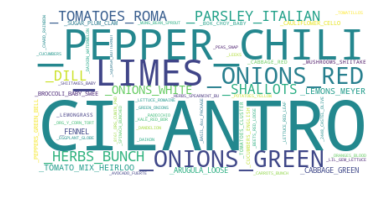

Topic #1:
['APPLES FUJI', 'PEAR BOSC', 'KIWI LOOSE', 'ORANGES VALENCIA', 'PEARS RED', 'GRAPEFRUIT', 'SATSUMA MANDARIN', '5290 WALNUTS', 'BLUEBERRIES', 'TANGELO MINNEOLA', 'MILTON CHEDDAR', 'CARA CARA NAVEL', 'POTATOES JAPANESE', 'PARADISO VINTAGE', '3185 ORG MANGO', 'ORANGES BLOOD', 'TOMATO MIX HEIRLOO', '4110 ORG RLD OATS', 'BEETS RED LOOSE', 'POTATOES RUSSET', 'BEANS GREEN', 'LETTUCE RED LEAF', '5120 ORG ALMONDS', 'EGGS DZ ST JOHN', '3080 MEDJOOL DATES', 'LETTUCE RED BUTTER', 'REFRIGERATED', 'STRAUS MILK 64oz', 'POTATOES YELLOW', 'RASPBERRY', 'MANGO', 'POTATOES GARNET', 'BAGEL', 'LEMONS MEYER', 'CARROTS LOOSE', 'CUCUMBERS', 'CLEMENTINE TANGERI', 'BLACKBERRY PACK', 'ORG WM QT CLOVER', 'NV SINGLE ROLL TP', 'MIX CHERRY TOMATO', 'CARROTS BABY', 'CUCUMBERS ENGLISH', '3290 THOMPSON RAIS', 'PARMIGIANO REGG', 'STRAUS YOGURT QT', 'LETTUCE ROMAINE', 'BROCCOLI BABY SWEE', 'LETTUCE SALAD MIX', 'SUGAR PLUM CLAM', 'BAKERY', 'ALXNDRE LARGE DZ', 'ORG 1LB BUTTER', 'WHOLE ORG MILK', 'ORGANIC 2% MILK']

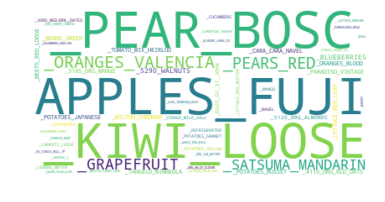

Topic #2:
['ONIONS YELLOW', 'POTATOES YELLOW', 'MUSHROOM CRIMINI', 'POTATOES RUSSET', 'POTATOES GARNET', 'SPINACH LOOSE', 'CARROTS BUNCH', 'LEEKS', 'CARROTS LOOSE', 'SHALLOTS', 'SQUASH BUTTERNUT', 'MILTON CHEDDAR', 'CAULIFLOWER CELLO', 'PEPPERS GREEN BELL', 'ROOTS PARSNIP', 'EGGS DZ ST JOHN', 'CABBAGE GREEN', 'EGGPLANT GLOBE', '3680 BAKERS CH FLO', 'PARMIGIANO REGG', 'STRAUS PLN YOG QT', '4110 ORG RLD OATS', 'POTATOES JAPANESE', 'ARUGULA LOOSE', 'ORG 1LB BUTTER', '2220 ORG RED LNTL', '8036 BAY LEAF ORG', 'EGGS DZ ROCK LG', 'POTATOES FINGERLIN', 'GARLIC PURPLE', 'FENNEL', 'BEETS GOLD LOOSE', 'PEAR BOSC', 'CLO UNSALTED BUTTE', 'LETTUCE RED LEAF', 'WHOLE ORG MILK', 'SQUASH DELICATA', '6265 OG W BASMATI', 'GREEN CHARD', 'TOMATOES CLUSTER', 'COLLARDS', 'PARADISO VINTAGE', 'STRAUS MILK 32oz', '2215 ORGANIC LENTI', 'ORG Y CORN TORT', 'CAULIFLOWER BULK', '2448 CASTEL OLIVE', 'ORG WM QT CLOVER', '2195 ORG GARBANZO', 'POTATOES JEWEL', 'CLOVER SALTED BUTT', 'SPROUTED FIRM TOFU', 'TOMATOES ROMA', 

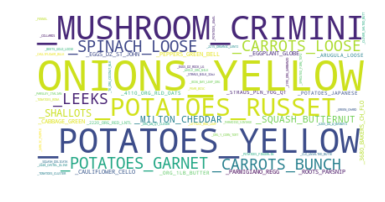

Topic #3:
['GARLIC WHITE', 'ONIONS RED', 'MUSHROOM CRIMINI', 'SHALLOTS', 'ONIONS WHITE', 'MUSHROOMS SHIITAKE', 'POTATOES YELLOW', 'POTATOES RUSSET', 'EGGPLANT GLOBE', 'TOMATOES ROMA', 'BEANS GREEN', 'PARMIGIANO REGG', 'HERBS BUNCH', 'LEMONS MEYER', '4110 ORG RLD OATS', '5290 WALNUTS', 'SUGAR PLUM CLAM', 'MILTON CHEDDAR', 'BAGEL', 'ORANGES BLOOD', 'BASIL 4oz PACKAGE', 'POTATOES JAPANESE', 'EGGS DZ ST JOHN', '4125 OG STL CUT OA', 'POTATOES GARNET', 'BROCCOLI BABY SWEE', 'WHOLE ORG MILK', 'LEEKS', 'SHIITAKES BABY', 'PARMIGIANO REGGIAN', 'TOMATOES CLUSTER', 'TOMATO MIX HEIRLOO', 'PARSLEY ITALIAN', 'GREEN ONIONS', 'APPLE HONEYCRISP', 'LETTUCE RED LEAF', 'BROCCOLI LOOSE', 'SPROUTED FIRM TOFU', 'ORG 1LB BUTTER', 'HERBS THYME CLMSH', 'CLO UNSALTED BUTTE', '2553BLACK OIL CURE', '3580 ORG POLENTA', 'SPINACH BUNCHED', '5657 OG OLIVE OIL', '3688 ULT BREAD FLO', 'CARA CARA NAVEL', 'BRUSSEL SPROUTS', '8161 ORG CUMIN PWD', '8036 BAY LEAF ORG', '8160 CUMIN SD ORG', 'MUSHROOMS KING TRU', 'PACKAGED FOOD

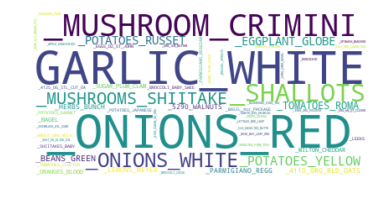

Topic #4:
['CELERY', 'CARROTS LOOSE', 'CUCUMBERS', 'LEEKS', 'BROCCOLI LOOSE', 'PARSLEY ITALIAN', 'BEETS RED LOOSE', 'POTATOES YELLOW', 'CABBAGE GREEN', 'POTATOES RUSSET', 'POTATOES GARNET', 'CABBAGE RED', 'FENNEL', 'SQUASH ZUCCHINI', 'BEANS GREEN', 'COLLARDS', 'MUSHROOM CRIMINI', 'ROOTS PARSNIP', 'SPINACH LOOSE', 'POTATOES JAPANESE', 'KALE GREEN', 'CHARD RED', 'SPINACH BUNCHED', 'CAULIFLOWER CELLO', 'PARSLEY CURLY', 'LETTUCE SALAD MIX', 'ROOTS TURNIP LOOSE', 'ONIONS RED', 'POTATOES RED', 'TOMATOES ROMA', 'ONIONS GREEN', 'LETTUCE ROMAINE', 'APPLES PINK LADY', 'TOMATOES CLUSTER', 'ROOT TURMERIC', 'PEAR BOSC', 'ARUGULA LOOSE', 'BOK CHOY BABY', '5290 WALNUTS', 'SQUASH BUTTERNUT', 'CUCUMBERS ENGLISH', 'DAIKON', 'LETTUCE RED LEAF', 'GREEN CHARD', 'BRUSSEL SPROUTS', 'CHARD RAINBOW', 'ASPARAGUS', 'DANDELION', 'APPLE HONEYCRISP', 'PEPPERS GREEN BELL', 'LETTUCE RED BUTTER', 'ORANGES VALENCIA', 'DAIKON WATERMELON', 'SHALLOTS', 'BROCCOLI BABY SWEE']


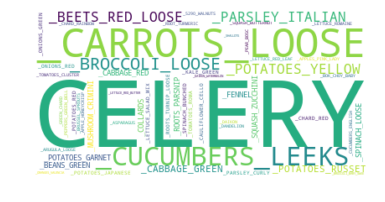

Topic #5:
['PEPPERS RED BELL', 'SQUASH ZUCCHINI', 'MUSHROOM CRIMINI', 'BEANS GREEN', 'BROCCOLI LOOSE', 'PEPPERS ORANGE BEL', 'PEPPERS YELLOW BEL', 'SPINACH LOOSE', 'CUCUMBERS', 'PEPPERS GREEN BELL', 'LETTUCE SALAD MIX', 'ONIONS RED', 'SUGAR PLUM CLAM', 'EGGPLANT GLOBE', 'TOMATOES ROMA', 'POTATOES GARNET', 'CAULIFLOWER CELLO', 'ARUGULA LOOSE', 'CARROTS LOOSE', 'TOMATO MIX HEIRLOO', 'LETTUCE RED LEAF', 'MUSHROOMS SHIITAKE', 'CABBAGE RED', 'TOMATOES CLUSTER', 'PEAS SNAP', 'BRUSSEL SPROUTS', 'POTATOES YELLOW', 'POTATOES RED', 'ASPARAGUS', 'LETTUCE ROMAINE', 'CUCUMBERS ENGLISH', 'CHARD RED', '4110 ORG RLD OATS', 'APPLES PINK LADY', 'APPLE HONEYCRISP', 'POTATOES RUSSET', 'KIWI LOOSE', 'PEAR BOSC', 'KALE GREEN', 'CAULIFLOWER BULK', 'CHERRY TOMATO CLAM', 'CABBAGE GREEN', '5290 WALNUTS', 'WILD 2 PACK', 'MIX CHERRY TOMATO', 'BOK CHOY BABY', 'BEETS RED LOOSE', 'SQUASH SUNBURST', 'POTATOES JAPANESE', 'SHIITAKES BABY', 'EGGS DZ ROCK LG', 'LETTUCE RED BUTTER', 'ORANGES VALENCIA', 'CHARD RAINBOW', 'P

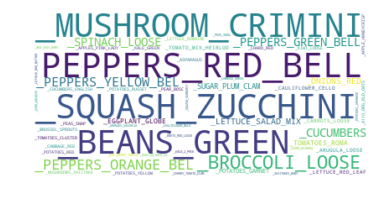

Topic #6:
['ORANGES NAVEL', 'GRAPEFRUIT', 'PEAR BOSC', 'APPLES PINK LADY', 'BAGEL', 'BROCCOLI LOOSE', 'APPLE HONEYCRISP', 'MILTON CHEDDAR', 'POTATOES RUSSET', 'POTATOES GARNET', 'BEANS GREEN', '4110 ORG RLD OATS', 'KIWI LOOSE', 'MUSHROOM CRIMINI', 'LETTUCE RED LEAF', 'POTATOES YELLOW', 'TOMATOES ROMA', 'TOMATOES CLUSTER', 'ORANGES BLOOD', 'LETTUCE SALAD MIX', '5290 WALNUTS', 'TANGELO MINNEOLA', 'WHOLE ORG MILK', 'PACKAGED FOOD', 'CABBAGE RED', 'CARROTS LOOSE', '3185 ORG MANGO', 'EGGPLANT GLOBE', 'ORGANIC 2% MILK', 'ORG WM QT CLOVER', 'CUCUMBERS', 'PEARS RED', 'MANGO', 'EGGS DZ ROCK LG', 'LIMES', 'STRAUS PLN YOG QT', 'BAG PINK LADY APPL', 'REFRIGERATED', 'APPLES GALA', '4125 OG STL CUT OA', 'SPINACH BUNCHED', 'LETTUCE RED BUTTER', 'BEETS RED LOOSE', 'COLLARDS', 'RADDICHIO', 'SUGAR PLUM CLAM', 'LEMONS MEYER', 'CAULIFLOWER BULK', '3080 MEDJOOL DATES', 'KALE GREEN', 'PEPPERS ORANGE BEL', '4105 QUICK OATS', '6080 RAVIOLI', '5120 ORG ALMONDS', 'MIX CHERRY TOMATO']


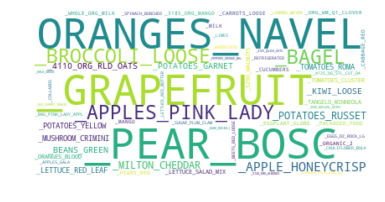

Topic #7:
['KALE DINO', 'SATSUMA MANDARIN', 'CARROTS BUNCH', 'BLUEBERRIES', 'BROCCOLI LOOSE', 'SPINACH LOOSE', 'BEANS GREEN', 'BAGEL', '5290 WALNUTS', 'ARUGULA LOOSE', 'CUCUMBERS', 'RASPBERRY', 'POTATOES GARNET', 'PEAR BOSC', 'KIWI LOOSE', 'SUGAR PLUM CLAM', 'MUSHROOMS SHIITAKE', '4110 ORG RLD OATS', 'GRAPEFRUIT', 'LETTUCE SALAD MIX', 'BROCCOLI BABY SWEE', 'TOMATO MIX HEIRLOO', 'ORANGES BLOOD', 'APPLES PINK LADY', 'BLACKBERRY PACK', 'CAULIFLOWER CELLO', 'POTATOES JAPANESE', 'LEEKS', 'CABBAGE RED', '3185 ORG MANGO', 'MILTON CHEDDAR', 'LEMONS MEYER', 'BEETS RED LOOSE', 'BRUSSEL SPROUTS', 'COLLARDS', 'PARSLEY ITALIAN', 'CHARD RED', 'POTATOES YELLOW', 'CARA CARA NAVEL', 'STRAWBERRY 1LB PKG', 'REFRIGERATED', 'MANGO', 'LETTUCE ROMAINE', 'APPLE HONEYCRISP', 'MUSHROOM CRIMINI', 'SQUASH BUTTERNUT', 'KALE GREEN', 'PEARS RED', 'MANGO ATAULFO', 'BOK CHOY BABY', 'WHOLE ORG MILK', 'PARADISO VINTAGE', 'CHARD RAINBOW', 'EGGS DZ ST JOHN', 'CABBAGE GREEN']


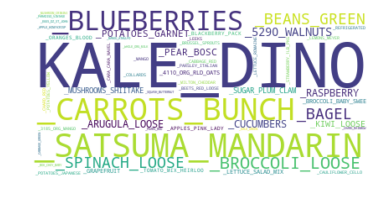

Topic #8:
['GINGER', 'ROOT TURMERIC', 'MUSHROOMS SHIITAKE', 'POTATOES GARNET', '8571 TURM PWD ORG', 'SPINACH LOOSE', 'BEETS RED LOOSE', 'BOK CHOY BABY', 'GARLIC PURPLE', 'PEAR BOSC', 'LEMONGRASS', 'SHALLOTS', 'LEMONS MEYER', 'KALE GREEN', '5290 WALNUTS', '8160 CUMIN SD ORG', '2220 ORG RED LNTL', '5120 ORG ALMONDS', 'ONIONS GREEN', 'BRUSSEL SPROUTS', 'POTATOES JAPANESE', 'FENNEL', '5150 BRAZIL NUTS', '4110 ORG RLD OATS', 'DAIKON', 'DANDELION', 'CABBAGE NAPA', '6645 SUNFLWR SEEDS', '8083 CARD POD ORG', 'WILDWOOD 16oz TOFU', '5180 WHOLE CASHEWS', 'SHIITAKES BABY', 'ORG WM QT CLOVER', '8106 CHAMOMILE ORG', 'KALE RED RUSSIAN', '8144 CORIANDER PWD', '2195 ORG GARBANZO', '4111 CHIA SEEDS', 'ROOTS BURDOCK', '6270 OG BR BASMATI', 'SPROUTED FIRM TOFU', '4112 SINTO KIMCHI', '8143 CORIANDER ORG', '3140 SHRED COCONUT', '5161 CASHEW PIECES', '5495 COCONUT OIL', 'GREEN ONIONS', '6605 BLACK SESAME', '8231 GARAM MASALA', '8161 ORG CUMIN PWD', 'WHOLE ORG MILK', 'BEETS RED BUNCHED', '6830 WILDFLWER HON',

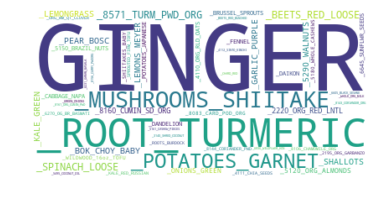

Topic #9:
['LEMONS', 'LIMES', 'CUCUMBERS', 'PARSLEY ITALIAN', 'GRAPEFRUIT', 'HERBS BUNCH', 'SHALLOTS', 'ARUGULA LOOSE', 'SPINACH LOOSE', 'CAULIFLOWER CELLO', 'ORANGES BLOOD', 'TOMATO MIX HEIRLOO', 'LETTUCE SALAD MIX', 'FENNEL', 'ORANGES VALENCIA', 'DILL', 'CUCUMBERS ENGLISH', 'RASPBERRY', 'TANGELO MINNEOLA', 'MANGO', 'MIX CHERRY TOMATO', 'BLUEBERRIES', 'super greens', 'PARMIGIANO REGG', 'KALE GREEN', 'CARA CARA NAVEL', 'ONIONS RED', 'SUGAR PLUM CLAM', 'BEETS RED LOOSE', 'POTATOES GARNET', '2448 CASTEL OLIVE', 'ROMANESQUE', 'BROCCOLI BABY SWEE', 'BABY ARUGULA CLAM', 'BLACKBERRY PACK', 'KIWI LOOSE', 'EVOLUTION', 'POTATOES JAPANESE', '5290 WALNUTS', 'BABY KALE PACKAGE', 'BRUSSEL SPROUTS', 'APPLE HONEYCRISP', 'RADDICHIO', 'ASPARAGUS', 'CLO UNSALTED BUTTE', 'PINEAPPLE', 'LACROIX GRPFRT12pk', 'BEETS GOLD LOOSE', 'MtV SPRKLING 1 LTR', 'EGGS DZ ROCK LG', 'DAIKON WATERMELON', 'LEEKS', 'EGGS DZ ST JOHN', 'EGGS ALEX KID 6PAC', '2458 PITD GRN OLIV']


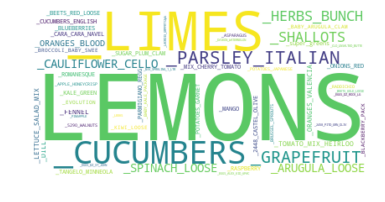

In [65]:
def print_top_items(model, feature_names, n_top_words):
    topics =[]
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        #topic_string=(" ".join([feature_names[i]for i in topic.argsort()[:-n_top_words - 1:-1]]))
        topic_string=str([feature_names[i]for i in topic.argsort()[:-n_top_words - 1:-1]])

        topics.append(topic_string)
        print(topic_string)
        #print()
        wordcloud = WordCloud(max_font_size=500, max_words=1000, background_color="white").generate(topic_string.replace(" ", "_").replace("'",""))

        # Display the generated image:
        #plt.figure(1,figsize=(10,10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        #plt.savefig('topic%d.png'%topic_idx)
        #plt.close()
        wordcloud.to_file('topic%d.png'%topic_idx)
print_top_items(model,list(items_set),55)

In [66]:
df['items'][1116]

[['', 'CLARAVALE COW MILK', 5.69, 13],
 ['DP', 'BOTTLE DEPOSIT', 2.0, 21],
 ['', 'BELLA CAPRA CHEVRE', 5.98, 14],
 ['', 'BAKERY', 2.99, 17],
 ['', 'BAKERY', 3.99, 17]]

In [67]:
def print_basket_contents(basket_id):
    basket=[]
    #print('+++++++++++++++++++++++next basket+++++++++++++++++')
    for items in df['items'][basket_id]:
        #for item in items:
        print("item:",items)
    #return basket
#print_basket_contents(1116)

In [238]:
def print_top_baskets(model, W, n_top_words):
    baskets = []
    for topic_idx, w in enumerate(W.T):
        basket_string=str([df['items'][i] for i in w.argsort()[:-n_top_words - 1:-1]])
        count = 0
        for i in w.argsort()[:-n_top_words - 1:-1]:
            count+=1
            print("++++++++++++++++++Topic #%d, basket #%d+++++++++++++++++++"%(topic_idx,count))
            print_basket_contents(i)
        #print_basket_contents([i for i in w.argsort()[:-n_top_words - 1:-1]])
        baskets.append(basket_string)
        #print(basket_string)
        #print()
        '''wordcloud = WordCloud(max_font_size=500, max_words=1000, background_color="white").generate(basket_string.replace(" ", "_").replace("'",""))

        # Display the generated image:
        #plt.figure(1,figsize=(10,10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        #plt.savefig('topic%d.png'%topic_idx)
        #plt.close()
        wordcloud.to_file('topic%d.png'%topic_idx)'''
print_top_baskets(model,W,10)

++++++++++++++++++Topic #0, basket #1+++++++++++++++++++
item: ['', 'CRV SMALL NO TAX', 0.05, 15]
item: ['', 'PEA SHOOTS', 4.99, 12]
item: ['', 'HERBS BUNCH', 1.69, 12]
item: ['', 'HERBS BUNCH', 1.69, 12]
item: ['', 'SKLNG COCO MELON', 2.29, 15]
item: ['', 'CRV SMALL SING T', 0.05, 15]
item: ['', '6099 RAVIOLI', 5.3, 16]
item: ['', '6425 ARBORIO RICE', 2.29, 16]
item: ['', 'CARROTS BUNCH', 2.99, 12]
item: ['', 'ORANGES BLOOD', 0.8, 12]
item: ['', 'PEAS SNAP', 5.51, 12]
item: ['', 'CILANTRO', 1.99, 12]
item: ['', 'CILANTRO', 1.99, 12]
item: ['', 'SQUASH SUNBURST', 1.3599999999999999, 12]
item: ['', 'HERBS OREGANO BNCH', 1.69, 12]
item: ['', 'HERBS TARRAGON BNC', 1.69, 12]
item: ['', 'HERBS TARRAGON BNC', 1.69, 12]
item: ['VD', 'HERBS TARRAGON BNC', -1.69, 12]
item: ['', 'ORANGES BLOOD', 1.76, 12]
item: ['', 'herbs bunched sorr', 1.69, 12]
item: ['', 'ONIONS GREEN', 5.97, 12]
item: ['', 'PARSLEY ITALIAN', 1.99, 12]
item: ['', 'HERBS CHIVES BNCH', 1.69, 12]
item: ['', 'FRISEE', 2.99, 12]


item: ['', 'POTATOES JAPANESE', 1.67, 12]
item: ['', 'GARLIC WHITE', 1.4, 12]
item: ['', 'CELERY', 5.89, 12]
item: ['', 'SPICY HUMMUS', 4.65, 13]
item: ['', 'CUCUMBERS', 2.07, 12]
item: ['', 'CARROTS LOOSE', 1.34, 12]
item: ['', 'ORANGES BLOOD', 5.99, 12]
item: ['', 'KIWI LOOSE', 1.83, 12]
item: ['', 'PEARS RED', 2.41, 12]
item: ['', 'APPLES FUJI', 3.62, 12]
item: ['', 'MILTON CHEDDAR', 6.69, 14]
item: ['', 'BROCCOLI BABY SWEE', 11.97, 12]
item: ['', '3080 MEDJOOL DATES', 5.35, 16]
item: ['', 'PEPPERS YELLOW BEL', 1.76, 12]
item: ['', 'LETTUCE ROMAINE', 2.99, 12]
item: ['', 'LETTUCE RED LEAF', 2.69, 12]
item: ['', 'LETTUCE ROMAINE', 2.99, 12]
item: ['', 'RAINCOAST FIG', 6.49, 14]
item: ['', 'BRILLAT SAVARIN', 5.32, 14]
item: ['MP', 'BAG CREDIT', -0.1, 23]
++++++++++++++++++Topic #1, basket #9+++++++++++++++++++
item: ['', 'GOE PARTY SIZ BLUE', 5.19, 15]
item: ['', '4665CHERRY VAN GR', 2.62, 16]
item: ['', 'DANDELION CHOC BAR', 9.99, 15]
item: ['', '70% DARK CHOC BAR', 3.49, 15]
item: [

item: ['', '5290 WALNUTS', 17.36, 16]
item: ['', '3685 WW BREAD FLOU', 4.13, 16]
item: ['', '3490 BARLEY FLOUR', 1.7000000000000002, 16]
item: ['', '3500 BUCKWHT FLOUR', 4.99, 16]
item: ['', '3685 WW BREAD FLOU', 4.32, 16]
item: ['', 'KALE DINO', 1.99, 12]
item: ['', 'KALE RED RUSSIAN', 1.99, 12]
item: ['', 'CELERY', 4.63, 12]
item: ['', 'HERBS BUNCH', 1.69, 12]
item: ['', 'SUGAR PLUM CLAM', 1.99, 12]
item: ['', 'SQUASH SPAGHETTI', 3.19, 12]
item: ['', 'SATSUMA MANDARIN', 7.15, 12]
item: ['', 'COCONUTS THAI YOUN', 4.49, 12]
item: ['', 'ONIONS RED', 1.12, 12]
item: ['', 'BEETS RED LOOSE', 1.43, 12]
item: ['', 'ONIONS YELLOW', 7.02, 12]
++++++++++++++++++Topic #3, basket #4+++++++++++++++++++
item: ['', 'MOZZARELLA CHEESE', 5.19, 14]
item: ['', 'ORGANIC HAVARTI', 4.49, 14]
item: ['', 'RUMIANO SL CHED', 4.49, 14]
item: ['', 'SPROUTED FIRM TOFU', 2.39, 13]
item: ['', 'MIX CHERRY TOMATO', 3.99, 12]
item: ['', 'ORGANIC EXTRA VIRG', 16.49, 15]
item: ['', 'MUSHROOMS SHIITAKE', 6.5, 12]
item: [

item: ['VD', 'BOK CHOY BABY', -1.6400000000000001, 12]
item: ['', 'BEETS RED LOOSE', 1.09, 12]
item: ['', 'RAPUNZ BOUILLON CB', 3.39, 15]
item: ['', 'SMALL COOLER CRV', 0.05, 13]
item: ['', 'SMALL COOLER CRV', 0.05, 13]
item: ['', 'CUCUMBERS', 3.77, 12]
item: ['', 'ROOT TURMERIC', 1.52, 12]
item: ['', 'LEMONS', 1.0, 12]
item: ['', 'EB SWEET POTATO', 1.49, 15]
item: ['', 'ALMOND RAISIN', 4.29, 15]
item: ['', 'ROSEMARY WHOLE', 2.99, 15]
item: ['', '4110 ORG RLD OATS', 1.17, 16]
item: ['', 'PLUM JUST PRUNES', 1.8900000000000001, 15]
item: ['', 'LAAVA ORIGINAL', 7.19, 13]
item: ['', '5150 BRAZIL NUTS', 1.54, 16]
item: ['', 'CASC RICE CAULIFLW', 3.79, 19]
item: ['', 'BLUEBERRIES', 5.99, 12]
item: ['', 'BLUEBERRIES', 5.99, 12]
item: ['', 'E F PARSLEY PLUS', 3.59, 7]
item: ['', 'KALE GREEN', 1.99, 12]
item: ['', 'Dead Sea Soap', 6.5, 4]
item: ['', 'FUNGUS MUSH MEDLEY', 5.89, 15]
item: ['', 'CHARD RED', 1.99, 12]
item: ['', 'CELERY', 1.96, 12]
item: ['', 'COLLARDS', 2.99, 12]
item: ['', 'BANAN

item: ['', '4080 OAT BERRIES', 1.65, 16]
item: ['MP', 'BAG CREDIT', -0.05, 23]
item: ['', 'MUSHROOM CRIMINI', 3.5700000000000003, 12]
item: ['MP', 'BAG CREDIT', -0.05, 23]
item: ['', '3685 WW BREAD FLOU', 3.88, 16]
item: ['MP', 'BAG CREDIT', -0.05, 23]
item: ['MP', 'BAG CREDIT', -0.9500000000000001, 23]
item: ['', '2235 ORG BABY LIMA', 2.51, 16]
item: ['', 'WOOD ALMD BUTTER', 11.49, 15]
item: ['', 'STARTER Pastry', 3.49, 17]
item: ['', '5140 TAMARI ALMOND', 6.5600000000000005, 16]
item: ['', '6880 ORG CANE SUGA', 4.64, 16]
item: ['', 'EGGS ST JOHN 6 PK', 4.29, 13]
item: ['', '5670 SAFFLOWER OIL', 2.5300000000000002, 16]
item: ['', '5657 OG OLIVE OIL', 5.93, 16]
item: ['', 'ITALIAN SAUSAGE', 5.39, 13]
item: ['', '2863 BTR CHOC CHIP', 4.33, 16]
item: ['', '2430 KALAMATA OLIV', 4.05, 16]
item: ['', 'PEAR BOSC', 4.14, 12]
item: ['', 'ONIONS YELLOW', 0.5700000000000001, 12]
item: ['', 'GRAPEFRUIT', 7.9, 12]
item: ['', 'GARLIC WHITE', 1.33, 12]
item: ['', 'HERITAGE FLAKE bag', 9.99, 15]
item

++++++++++++++++++Topic #7, basket #1+++++++++++++++++++
item: ['', 'RUSTIC FLATBREAD', 5.99, 14]
item: ['', 'RUSTIC ROSEMARY', 5.99, 14]
item: ['', 'PACIFIC LS VEG BRO', 3.79, 15]
item: ['', 'LYETH CABERNET', 9.99, 10]
item: ['', 'ORG Whipping crm', 4.59, 13]
item: ['', 'HUSCH CHARD 375ml', 8.99, 10]
item: ['', 'MAASDAMMER', 5.24, 14]
item: ['', 'VANILLA YOGURT', 1.79, 13]
item: ['', 'BC COFFEE YOGURT', 0.99, 13]
item: ['', 'BC COFFEE YOGURT', 0.99, 13]
item: ['', 'APPLES FUJI', 10.05, 12]
item: ['', 'BC COFFEE YOGURT', 0.99, 13]
item: ['', 'VANILLA YOGURT', 1.79, 13]
item: ['', 'KEFIR BLACKBERRY', 1.99, 13]
item: ['', 'MILD CHEDDAR CHEES', 4.12, 14]
item: ['', 'AMY VEG POCKET', 3.39, 19]
item: ['', 'AMY SPIN LASAGNA', 5.79, 19]
item: ['', 'AMY VEG POCKET', 3.39, 19]
item: ['', 'CHOC COCONUT LUNA', 1.19, 15]
item: ['', 'POMEGRANATE', 3.79, 13]
item: ['', 'SMALL COOLER CRV', 0.05, 13]
item: ['', 'CAULIFLOWER CELLO', 3.99, 12]
item: ['', 'KARLIN BAKING SODA', 0.99, 15]
item: ['', 'KARLI

item: ['', 'HERBS CHERVIL', 1.69, 12]
item: ['', 'EDIBLE FLOWERS', 4.99, 12]
item: ['', 'ROOT TURMERIC', 3.5700000000000003, 12]
item: ['', 'LIMES', 7.62, 12]
item: ['', 'BLACKBERRY PACK', 5.99, 12]
item: ['', 'HERBS TARRAGON CLM', 1.69, 12]
item: ['', 'daikon sprouts', 4.99, 12]
item: ['', 'DILL', 2.99, 12]
item: ['', 'BLUEBERRIES', 5.99, 12]
item: ['', 'RASPBERRY', 5.99, 12]
item: ['', 'ORANGES BLOOD', 15.6, 12]
item: ['', 'LETTUCE RED BUTTER', 16.45, 12]
item: ['', 'ONIONS RED', 6.25, 12]
item: ['', 'LEMONS', 2.26, 12]
item: ['', 'KUMQUAT', 3.92, 12]
item: ['', 'watercress bag', 3.49, 12]
item: ['', 'HERBS BUNCH', 1.69, 12]
item: ['', 'ENDIVE BELGIAN YEL', 9.79, 12]
item: ['', 'watercress bag', 3.49, 12]
item: ['', 'ONIONS GREEN', 1.99, 12]
item: ['', 'ONIONS GREEN', 1.99, 12]
item: ['', 'PARSLEY ITALIAN', 1.99, 12]
item: ['', 'PARSLEY ITALIAN', 1.99, 12]
item: ['', 'HERBS BUNCH', 1.69, 12]
item: ['', 'CABBAGE GREEN', 3.94, 12]
item: ['', 'SQUASH GREEN ACORN', 14.02, 12]
item: ['', 

item: ['', 'KALE RED RUSSIAN', 1.99, 12]
item: ['', 'NV GENTLE SCRUBBER', 1.19, 7]
item: ['', '8228 GINGER PEACH', 6.0, 11]
item: ['', 'GARLIC WHITE', 1.19, 12]
item: ['', 'AVOCADOS HASS', 2.23, 12]
item: ['', 'NAT VAL WALNUT SPO', 1.25, 7]
item: ['MP', 'BAG CREDIT', -0.1, 23]
++++++++++++++++++Topic #8, basket #9+++++++++++++++++++
item: ['', 'LETTUCE RED ROMAIN', 2.99, 12]
item: ['VD', 'LETTUCE RED ROMAIN', -2.99, 12]
item: ['', 'RADDICHIO', 5.75, 12]
item: ['', 'ONIONS YELLOW', 2.32, 12]
item: ['', 'APPLES FUJI', 2.03, 12]
item: ['', 'HERBS BUNCH', 1.69, 12]
item: ['', 'DILL', 2.99, 12]
item: ['', 'LEMONS', 3.41, 12]
item: ['', 'GARLIC WHITE', 3.01, 12]
item: ['', '6880 ORG CANE SUGA', 2.13, 16]
item: ['', 'SHALLOTS', 0.8, 12]
item: ['', 'ENDIVE BELGIAN YEL', 5.49, 12]
item: ['', 'LEMONS MEYER', 3.43, 12]
item: ['', 'RADDICHIO', 8.23, 12]
item: ['', 'CLO UNSALTED BUTTE', 5.39, 13]
item: ['', '8094 CAYENNEORG75K', 0.21, 11]
item: ['', '5352 ALMOND BUTTER', 12.53, 16]
item: ['', 'BULK

item: ['', 'WELLNESS RESCUE', 3.99, 13]
item: ['', 'SMALL COOLER CRV', 0.05, 13]
item: ['', 'BEETS RED BUNCHED', 2.69, 12]
item: ['', 'GREEN CHARD', 1.99, 12]
item: ['', 'GREEN CHARD', 1.99, 12]
item: ['', 'TOMATO MIX HEIRLOO', 9.98, 12]
item: ['', 'CAULI BREAD', 5.99, 17]
item: ['', 'PFCT BAR PB CHI', 2.89, 15]
item: ['', 'ONIONS WHITE', 2.13, 12]
item: ['', 'EGGS JUDY LG DZ', 5.19, 13]
item: ['', 'PETITE BAGUETTE', 1.35, 17]
item: ['', 'BROCCOLI BABY SWEE', 3.29, 12]
item: ['', 'BROCCOLI BABY SWEE', 3.29, 12]
item: ['', 'ROMANESQUE', 3.31, 12]
item: ['', 'CAULIFLOWER CELLO', 2.99, 12]
item: ['', 'POTATOES FINGERLIN', 2.7800000000000002, 12]
item: ['', 'BANANAS', 2.47, 12]
item: ['', 'AVOCADOS HASS', 5.75, 12]
item: ['', 'CARROTS BUNCH', 2.99, 12]
item: ['', 'CARROTS BUNCH', 2.99, 12]
item: ['', 'ORLANDO TANGELO', 2.66, 12]
item: ['', 'GINGER', 0.75, 12]
item: ['', 'CABBAGE GREEN', 2.47, 12]
item: ['', 'LEMONS', 3.2800000000000002, 12]
item: ['', 'LIMES', 1.52, 12]
item: ['', 'LESSER 

In [71]:
W[:,1]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       3.90617938e-06, 2.20951407e-06, 0.00000000e+00])

In [74]:
n_top_words=10
for i,w in enumerate(W.T):
    print(i,w.argsort()[:-n_top_words - 1:-1])

0 [2484 2136  206 1022 2130 1465  456  168  272  144]
1 [ 116 1239 1090  326 1093 1938 1919 2311 1273 2116]
2 [1159 1189  383  722 1864 1368 1391 1136  537  314]
3 [2134 2142 2132 1946 1326 1491 2256  798 1593 1994]
4 [ 209  202 2481 2486 1566  289 2207 1272  307  793]
5 [2400  447 1231 1804 2372 1210  817  808  688 2081]
6 [ 911 1696 1927 1086 1285  131 1265 1322  700  672]
7 [2278 2094 2129 2133 2236 2242 2089 2454  161 2481]
8 [ 422 1025 1018  735  447 1589 2129 2133 1698  237]
9 [ 525  238  239 1284 2454  115 2396 2150 1942 1559]


In [76]:
len(list(items_set))

6576

In [75]:
for topic in H:
    print (topic.argsort()[:-10-1:-1])

[1752 6585 2198 2188 2189 2190 2191 2192 2193 2194]
[1271 6539 4820   80 4966 1929 2604 6546 2660 4806]
[6114 3455  640 2958  537   84 2189 4025 1017 4051]
[3058 2646 2476 5751 5768 6309 4302 4243 3450 6388]
[1484 4994 5017  125 4381  102 1207  435 1811 4079]


In [ ]:
feat
str([feature_names[i]for i in topic.argsort()[:-n_top_words - 1:-1]])

In [72]:
df.shape[0]
for i in range(10,11):
    row = df['items'][i:i+1]
    for item in row:
        for it in item:
            print (it[1],it[2])

4112 SINTO KIMCHI 13.54
PEPPERS RED BELL 2.75
CUCUMBERS 12.73
ORGANIC 2LB TOFU 20.95
5540 TAHINI 12.17
GINGER 4.79
GARLIC WHITE 3.01
PRODUCE SCALE 1.79
LIMES 2.0
CILANTRO 1.99
CILANTRO 1.99
BROCCOLI LOOSE 6.24
CELLO CAULIFLOWER 11.96
LEEKS 9.12
SUGAR PLUM CLAM 5.97
BEETS RED LOOSE 6.01
store 100% Bulks -34.5
store 100% Produce -70.35
store 100% Refrig -20.95


In [12]:
df.shape[0]
for i in range(10,11):
    row = df['items'][i:i+1]
    for item in row:
        for it in item:
            df[it[1]][i:i+1]=df[it[1]][i:i+1]+it[2]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
df['CILANTRO'][10:11]

10    3.98
Name: CILANTRO, dtype: float64

In [19]:
df.shape[0]
for i in range(1,df.shape[0]):
    row = df['items'][i:i+1]
    for item in row:
        for it in item:
            df[it[1]][i:i+1]=df[it[1]][i:i+1]+it[2]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
df.shape

(2535, 6586)

In [22]:
df.to_pickle('02012019.pkl')

In [213]:
len(items_set)

6576

In [114]:
trans = []
for a in df[1:2]['items']:
    #trans.append([r for v in a for r in v])
    trans.append(a)
print(a)

[['', 'BLUEBERRIES', 5.99, 12], ['', 'ALXNDRE YOGURT', 4.99, 13], ['MP', 'Worker 20% Produce', -1.2, 12], ['MP', 'Worker 20% Refrig', -1.0, 13]]


In [96]:
trans =[]
for l in [i for i in df[1:2]['items']]:
    print (l)
    trans.append(l)
    print (trans)

[['', 'BLUEBERRIES', 5.99, 12], ['', 'ALXNDRE YOGURT', 4.99, 13], ['MP', 'Worker 20% Produce', -1.2, 12], ['MP', 'Worker 20% Refrig', -1.0, 13]]
[[['', 'BLUEBERRIES', 5.99, 12], ['', 'ALXNDRE YOGURT', 4.99, 13], ['MP', 'Worker 20% Produce', -1.2, 12], ['MP', 'Worker 20% Refrig', -1.0, 13]]]


In [4]:
#pd.get_dummies([i for i in df[1:2]['items']]).values()

In [80]:

type(df['items'].values)
count=0
for document in df['items'][1]:
    print (document)
    
    for word in(document):
        count+=1
        print (count,word)
        '''for letter in str(word):
            print (letter)'''

['', 'BLUEBERRIES', 5.99, 12]
1 
2 BLUEBERRIES
3 5.99
4 12
['', 'ALXNDRE YOGURT', 4.99, 13]
5 
6 ALXNDRE YOGURT
7 4.99
8 13
['MP', 'Worker 20% Produce', -1.2, 12]
9 MP
10 Worker 20% Produce
11 -1.2
12 12
['MP', 'Worker 20% Refrig', -1.0, 13]
13 MP
14 Worker 20% Refrig
15 -1.0
16 13


NameError: name 'plt' is not defined

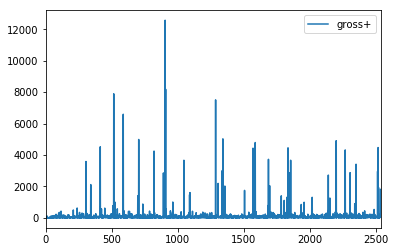

In [51]:
df[['gross+','time']].plot()
plt.show()

In [33]:
ff= './tlogs/201902'
if ff.startswith("./tlogs"):
    print ("yep")

yep


In [18]:
for f in os.walk('./tlogs'): print ("f:",f,"sub:",sub)


f: ('./tlogs', ['201902'], ['.DS_Store']) sub: []
f: ('./tlogs/201902', ['20190202', '20190203', '20190204', '20190205', '20190206', '20190207', '20190208', '20190209', '20190210', '20190211', '20190212', '20190213', '20190214', '20190215', '20190216', '20190217', '20190218', '20190219', '20190220', '20190221', '20190222', '20190223', '20190224', '20190225', '20190226', '20190227', '20190228', '20190301'], ['.DS_Store']) sub: []
f: ('./tlogs/201902/20190202', [], ['checklisting.txt', 'department.txt', 'Department01Discounts.txt', 'Department04Discounts.txt', 'Department06Discounts.txt', 'Department07Discounts.txt', 'Department08Discounts.txt', 'Department09Discounts.txt', 'Department10Discounts.txt', 'Department11Discounts.txt', 'Department12Discounts.txt', 'Department13Discounts.txt', 'Department14Discounts.txt', 'Department15Discounts.txt', 'Department16Discounts.txt', 'Department17Discounts.txt', 'Department19Discounts.txt', 'Department26Discounts.txt', 'dept.txt', 'discountitems.tx

In [ ]:
import os

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #print os.path.join(subdir, file)
        filepath = subdir + os.sep + file

        if filepath.endswith(".asm"):
            print (filepath)

In [8]:
df=pd.read_pickle('02012019.pkl')

In [10]:
df[df['BANANAS']!=0]

,date,gross+,gross-,items,net,oper,term,time,trans,type,...,PRO BAR MINT CHOC,8213 FENNEL POWDER,OR Cooked Beets,JR Melatonin SR 12,NUT WALNUT,QT Elderbry Loz 36,SW WB Vanilla 12pk,6556 DUTCH COCOA,lvngClyBntonte 8oz,CARDAMOM BITTERS
36,2001-02-19,37.65,0.00,"[[, PASCHA UNSWT CCHIP, 4.99, 15], [, PRIMAVER...",37.65,104,5,09:16,8,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,2001-02-19,108.17,0.00,"[[, FORGER PL CSH YOG, 5.59, 13], [, SO DEL UN...",108.17,42,6,09:20,12,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,2001-02-19,20.72,0.00,"[[, APPLES FUJI, 2.42, 12], [, 8308KEEMUN BLAC...",20.72,11,1,09:27,7,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,2001-02-19,144.42,0.00,"[[, WOODSTK BLUEBERRIE, 6.29, 19], [, EVOLUTIO...",144.42,42,6,09:30,17,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,2001-02-19,17.69,0.00,"[[, COELA ZIPPER TOTE, 9.99, 6], [, BANANAS, 2...",17.69,42,6,09:31,18,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,2001-02-19,224.03,0.00,"[[, APPLE JUICE, 11.39, 15], [, ORG GAL CLOVER...",224.03,104,5,09:32,21,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,2001-02-19,80.01,0.00,"[[, MAC HAWAI SEA SALT, 7.99, 15], [, UMLAUT C...",80.01,42,6,09:35,21,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,2001-02-19,86.51,0.00,"[[, FLAVORG VANILLA4oz, 15.49, 15], [, SUGAR P...",86.51,34,8,09:39,12,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,2001-02-19,285.53,0.00,"[[, VH Kids Vibe Choc, 34.4, 1], [, EZ Ultimat...",285.53,11,1,09:40,18,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,2001-02-19,55.73,0.00,"[[, QRT CAN JAR t101, 1.79, 6], [, QRT CAN JAR...",55.73,42,6,09:41,25,Checkout,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
df.columns

Index(['date', 'gross+', 'gross-', 'items', 'net', 'oper', 'term', 'time',
       'trans', 'type'],
      dtype='object')

In [ ]:
plt.scatter(x=df['time'],y=df['gross+'])

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
